# I. Perkenalan

`Muhammad Sofyan Nurul Jamal`

## Dataset Description

| week_number   | Berisi informasi minggu produk tertentu terjual, (2021-52 to 2023-14). |
|---------------|----------------------------------------------------------------------------|
| week_start_date | Berisi informasi tentang tanggal mulai minggu dari produk tertentu yang terjual. |
| week_end_date   | Berisi informasi tentang tanggal akhir minggu dari produk tertentu yang dijual. |
| product_item   | Berisi informasi tentang item produk/kode produk (Variabel Bebas). |
| quantity      | Berisi informasi tentang jumlah produk pada minggu masing-masing. |

## Problem Statement

Membuat model time series analysis dan model forecasting untuk mengestimasi kuantitas produk yang akan terjual pada periode berikutnya berdasarkan data historis.

## Objective

- Mampu meramalkan Kuantitas pada periode berikutnya dari dataset ParagonCorp.
- Model kerja Anda mampu mencapai Tingkat Akurasi yang baik.
- Mampu menjelaskan metodologi yang digunakan untuk setiap langkah, algoritma, manipulasi data, pembersihan data, dll.
- Mampu memberikan grafik atau metode terukur lainnya untuk membuktikan kesimpulan Anda.

# II. Sumber Data 

[Sample Data Noarea](https://github.com/ardhiraka/talent_fair_sample_challenge/blob/main/datasets/sample_dataset_timeseries_noarea.csv)

# III. Import Library

In [1]:
!pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split

from statsmodels.tsa.statespace.sarimax import SARIMAX


# IV. Data Loading

Data kami import kedalam notebook dan memasukkannya dalam dataframe dengan nama 'df'

In [4]:
df = pd.read_csv('sample_dataset_timeseries_noarea.csv')

## Overview Data

Pertama-tama kita akan melihat 5 data teratas dan dan 5 data terbawah

In [5]:
df.head() # overview 5 data teratas

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4
3,2021-52,2021-12-27,2022-01-02,019502f6d13e383caa9b9673bf1302f8,148
4,2021-52,2021-12-27,2022-01-02,01e7ca6d4e21badc1d4225b6b2c7bd9e,119


In [6]:
df.tail() # overview 5 data terbawah

,week_number,week_start_date,week_end_date,product_item,quantity
102728,2023-14,2023-04-03,2023-04-09,ff3890faa80ff425ae906e27bbc50bc6,907
102729,2023-14,2023-04-03,2023-04-09,ff4b0f3b9c78c91510a4e3920fbc5090,81
102730,2023-14,2023-04-03,2023-04-09,ff9d05a4d6f922b3ab1653f58165b8ce,16
102731,2023-14,2023-04-03,2023-04-09,ffbd6f1d884056a4f622d54ae79e5a14,42920
102732,2023-14,2023-04-03,2023-04-09,fff18f7c705e729746515e2053dee64b,53


Selanjutnya  ada berapa baris dan kolom yang ada di data kita.

In [7]:
df.shape # untuk melihat dimensi data

(102733, 5)

Dapat kita lihat data kita terdiri dari 102 733 baris dan 5 kolom. Selanjutnya kita akan melihat tipe data yang kita punya.

In [8]:
df.info() # Mengecheck tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102733 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   week_number      102733 non-null  object
 1   week_start_date  102733 non-null  object
 2   week_end_date    102733 non-null  object
 3   product_item     102731 non-null  object
 4   quantity         102733 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


Terlihat dalam data kita terdapat 1 kolom berbentuk intg69 dan 4 kolom berbentuk object. Selanjutnya memriksa missing value dalam data kita.

In [9]:
df.isnull().sum() #  memeriksa dan menjumlahkan missing value

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

Terlihat dalam data kita terdapat 2 baris yang mengandung missing value, nanti akan kita analisa apakah kita handle dengan dropping atau imputasi. selanjutnya kita akan melihat kolom yang kita punya.

In [10]:
print(df.columns.values) # melihat kolom yang kita punya

['week_number' 'week_start_date' 'week_end_date' 'product_item' 'quantity']


Selanjutnya kita akan melihat atau mengkategorikan data ke numerical dan kategorikal

In [11]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

print("Fitur numerik: ", num_col)
print("Fitur kategorikal: ", cat_col)

Fitur numerik:  ['quantity']
Fitur kategorikal:  ['week_number', 'week_start_date', 'week_end_date', 'product_item']


Kemudian kita akan melihat sekilas deskripsi data numerik yang kita punya.

In [12]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,102733.0,3191.562419,12074.631014,0.0,75.0,414.0,1890.0,774732.0


Dari output deskripsi statistik yang diberikan, terdapat beberapa insight dan analisis yang dapat diperoleh, yaitu:

- Jumlah observasi atau sampel yang tersedia adalah 102733.
- Rata-rata jumlah produk yang terjual pada setiap minggu sebesar 3191,56.
- Standar deviasi dari jumlah produk yang terjual pada setiap minggu sebesar 12074,63, yang menunjukkan bahwa jumlah produk yang terjual pada setiap minggu sangat bervariasi.
- Jumlah produk terjual pada minggu terendah adalah 0, sementara jumlah produk terjual pada minggu tertinggi mencapai 774732.
- Quartil pertama (25%) dari jumlah produk yang terjual pada setiap minggu adalah sebesar 75, dan quartil kedua (50%) adalah 414. Hal ini menunjukkan bahwa sekitar 25% sampai 50% minggu mengalami penjualan rendah.
- Quartil ketiga (75%) dari jumlah produk yang terjual pada setiap minggu adalah sebesar 1890, yang menunjukkan bahwa sekitar 75% sampai 100% minggu mengalami penjualan tinggi.
- Dari analisis deskripsi statistik ini, dapat disimpulkan bahwa penjualan produk pada minggu tertentu sangat beragam, dan beberapa minggu memiliki penjualan yang sangat rendah, sementara beberapa minggu memiliki penjualan yang sangat tinggi. Hal ini dapat menjadi pertimbangan bagi perusahaan dalam melakukan perencanaan bisnis dan manajemen stok.

Selanjutnya kita akan melihat data kategorical yang kita punya

In [13]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

week_number

2022-31    1831
2022-33    1712
2022-36    1680
2022-39    1660
2022-34    1659
           ... 
2022-10    1457
2022-08    1444
2022-09    1417
2022-18    1352
2021-52     450
Name: week_number, Length: 67, dtype: int64
----------
week_start_date

2022-08-01    1831
2022-08-15    1712
2022-09-05    1680
2022-09-26    1660
2022-08-22    1659
              ... 
2022-03-07    1457
2022-02-21    1444
2022-02-28    1417
2022-05-02    1352
2021-12-27     450
Name: week_start_date, Length: 67, dtype: int64
----------
week_end_date

2022-08-07    1831
2022-08-21    1712
2022-09-11    1680
2022-10-02    1660
2022-08-28    1659
              ... 
2022-03-13    1457
2022-02-27    1444
2022-03-06    1417
2022-05-08    1352
2022-01-02     450
Name: week_end_date, Length: 67, dtype: int64
----------
product_item

0073377087c7ddace313ff829cd7b0b3    67
870b3ad8c41b746b29ba31f6e4040950    67
9264576b8833b892b34a39525bcdd271    67
921cfbd1930eeee6b82a7b053c4ed8dc    67
91f65f29b32c39788b42

In [14]:
# categorical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  week_number
Total unique labels:  67
------------------------------
Column:  week_start_date
Total unique labels:  67
------------------------------
Column:  week_end_date
Total unique labels:  67
------------------------------
Column:  product_item
Total unique labels:  2309
------------------------------


Sekilas dari pengamatan kami :

- Kolom week_number, week_start_date, dan week_end_date memiliki jumlah label unik yang sama, yaitu 67. Hal ini menunjukkan bahwa setiap nomor minggu memiliki tanggal mulai dan akhir yang konsisten dalam rentang waktu 67 minggu (dari 2021-52 hingga 2023-14).

- Kolom product_item memiliki jumlah label unik sebanyak 2309. Ini menunjukkan bahwa dataset ini mencakup beberapa jenis produk yang berbeda. Hal ini perlu dipertimbangkan dalam analisis selanjutnya karena setiap produk dapat memiliki karakteristik penjualan yang berbeda.

- Dari insight di atas, kita dapat menyimpulkan bahwa dataset ini mencakup data penjualan produk dalam rentang waktu 67 minggu yang berbeda dan berbagai jenis produk yang berbeda. Analisis lebih lanjut perlu dilakukan untuk mengevaluasi karakteristik penjualan produk dan pola penjualan dari waktu ke waktu.

Kemudian kita akan melihat apakah data kita ada yang terduplikasi

In [15]:
df[df.duplicated()].shape # melihat ada tidaknya data yang terduplikat

(0, 5)

Terlihat data kita tidak ada yang terduplikasi.

Berikut ikhtisar dari beberapa overview yang telah kita lakukan

- Data yang kita punya terdiri dari 102 733 baris dan 5 kolom.
- Di dalam data ini 1 kolom berbentuk intg69 dan 4 kolom berbentuk object.
- Sekilas data yang kita terdapat 2 baris terindikasi memiliki missing value. nanti akan kita analisa lebih lanjut, apakah kita handle dengan dropping atau inputasi.
- Dari hasil pemeriksaan, data kita tidak terdapat duplikasi.

## Data Cleaning

Disini kita akan mengcleaning data dengan menghandle data yang mengandung missing value atau yang terduplikasi dll. Pertama tama dataframe yang digunakan  akan disimpan dengan nama df_clean

In [16]:
df_clean = df.copy()      # dataframe yang digunakan pada sesi ini akan disimpan dengan nama df_clean 
df_clean.head(3)

,week_number,week_start_date,week_end_date,product_item,quantity
0,2021-52,2021-12-27,2022-01-02,0073377087c7ddace313ff829cd7b0b3,41
1,2021-52,2021-12-27,2022-01-02,012d2bb142b2d5e57330acbfd8e9ac52,430
2,2021-52,2021-12-27,2022-01-02,0192926e33d1153b63511a5b83eca843,4


In [17]:
df_clean.isnull().sum() #  memeriksa dan menjumlahkan missing value

week_number        0
week_start_date    0
week_end_date      0
product_item       2
quantity           0
dtype: int64

In [18]:
# Filter rows with missing value in 'product_item' column
missing_data = df_clean[df_clean['product_item'].isna()]

# Print the rows with missing value
print(missing_data)

      week_number week_start_date week_end_date product_item  quantity
18048     2022-12      2022-03-21    2022-03-27          NaN       119
19536     2022-13      2022-03-28    2022-04-03          NaN       147


Dalam kasus ini, dapat dilihat bahwa nilai yang hilang pada kolom 'product_item' tidak memiliki hubungan dengan nilai yang hilang pada kolom 'quantity', sehingga dapat diasumsikan bahwa nilai yang hilang pada kolom 'product_item' bersifat missing completely at random (MCAR). Hal ini berarti bahwa kemungkinan terjadinya nilai yang hilang tidak berkaitan dengan nilai dari variabel lain pada dataset tersebut. Sehingga,kami memtuskan untuk menghandlenya dengan metode droping.

Selanjutnya kita akan melakukan imputasi menggunakan modus.

In [19]:
df_clean = df_clean.dropna()

In [20]:
df_clean.isnull().sum() #  memeriksa dan menjumlahkan missing value (after)

week_number        0
week_start_date    0
week_end_date      0
product_item       0
quantity           0
dtype: int64

Terlihat dari standar missing value data kita sudah bersih dari missing value, sekarang kita akan melakukan pengecheckan non standar untuk memastikan.

In [21]:
# memeriksa apakah ada missing value yang tidak biasa atau non standar
miss = {}

for i in list(df_clean.columns):
    miss[i] = 0
    for a in df_clean[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'week_number': 0,
 'week_start_date': 0,
 'week_end_date': 0,
 'product_item': 0,
 'quantity': 0}

Dengan metode non standar missing value, kami tidak menemukan missing value. 

In [22]:
df_clean['week_start_date']=pd.to_datetime(df_clean['week_start_date'])
df_clean['week_end_date']=pd.to_datetime(df_clean['week_end_date'])

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102731 entries, 0 to 102732
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week_number      102731 non-null  object        
 1   week_start_date  102731 non-null  datetime64[ns]
 2   week_end_date    102731 non-null  datetime64[ns]
 3   product_item     102731 non-null  object        
 4   quantity         102731 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.7+ MB


In [24]:
df_clean.drop(columns=[
'week_number','week_end_date','product_item'
], inplace=True)

df_clean

,week_start_date,quantity
0,2021-12-27,41
1,2021-12-27,430
2,2021-12-27,4
3,2021-12-27,148
4,2021-12-27,119
...,...,...
102728,2023-04-03,907
102729,2023-04-03,81
102730,2023-04-03,16
102731,2023-04-03,42920


In [25]:
df_clean = df[['week_start_date','quantity']]
df_clean.set_index('week_start_date', inplace=True)
df_clean.groupby('week_start_date')['quantity'].sum()
df_clean = pd.DataFrame(df_clean.groupby('week_start_date')['quantity'].sum()).sort_index() 
df_clean

,quantity
week_start_date,
2021-12-27,128808
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
...,...
2023-03-06,4775638
2023-03-13,4787111
2023-03-20,4757590


# V. Exploratory Data Analysis (EDA)

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

## EDA for Analysis Purpose

In [26]:
df_clean.describe().T # melihat deskripsi data

,count,mean,std,min,25%,50%,75%,max
quantity,67.0,4.893713e+06,1.044439e+06,128808.0,4337715.5,4907074.0,5619344.0,7172144.0


Dari output deskripsi statistik yang diberikan, terdapat beberapa insight dan analisis yang dapat diperoleh, yaitu:

- Jumlah observasi atau sampel yang tersedia adalah 102731.
- Rata-rata jumlah produk yang terjual pada setiap minggu sebesar 3191,62.
- Standar deviasi dari jumlah produk yang terjual pada setiap minggu sebesar 12074,74, yang menunjukkan bahwa jumlah produk yang terjual pada setiap minggu sangat bervariasi.
- Jumlah produk terjual pada minggu terendah adalah 0, sementara jumlah produk terjual pada minggu tertinggi mencapai 774732.
- Quartil pertama (25%) dari jumlah produk yang terjual pada setiap minggu adalah sebesar 75, dan quartil kedua (50%) adalah 414. Hal ini menunjukkan bahwa sekitar 25% sampai 50% minggu mengalami penjualan rendah.
- Quartil ketiga (75%) dari jumlah produk yang terjual pada setiap minggu adalah sebesar 1890, yang menunjukkan bahwa sekitar 75% sampai 100% minggu mengalami penjualan tinggi.
- Dari analisis deskripsi statistik ini, dapat disimpulkan bahwa penjualan produk pada minggu tertentu sangat beragam, dan beberapa minggu memiliki penjualan yang sangat rendah, sementara beberapa minggu memiliki penjualan yang sangat tinggi. Hal ini dapat menjadi pertimbangan bagi perusahaan dalam melakukan perencanaan bisnis dan manajemen stok.

Dari sini tidak terlihat adanya anomali pada data karena tidak ada nilai yang sangat jauh dari nilai rata-rata dan tidak ada nilai negatif pada kolom quantity.

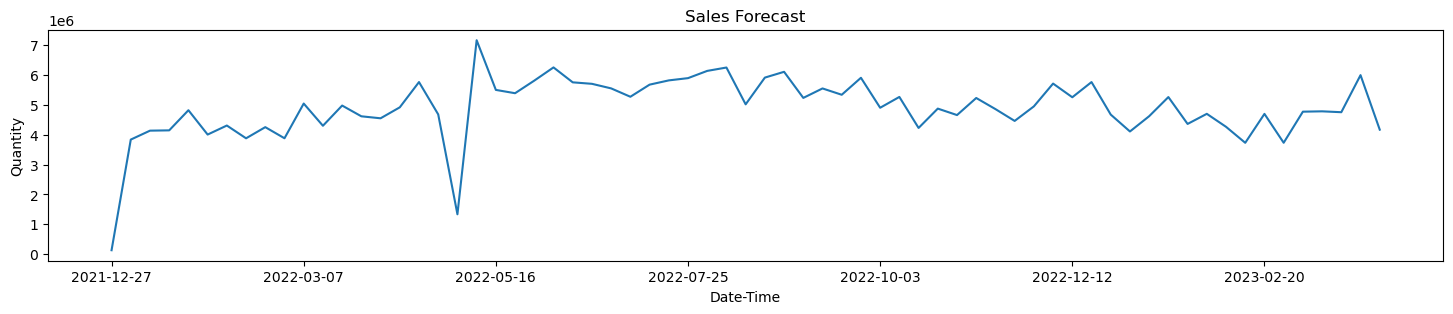

In [27]:
fig, ax = plt.subplots(figsize=(18, 3))
df_clean['quantity'].plot(ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Quantity')
ax.set_title('Sales Forecast')
plt.show()

In [28]:
# Dropping the data before 2022
new_df = df_clean.copy()
new_df = df_clean['2022':]
new_df.head()

,quantity
week_start_date,
2022-01-03,3839557
2022-01-10,4138934
2022-01-17,4149077
2022-01-24,4824273
2022-01-31,4008027


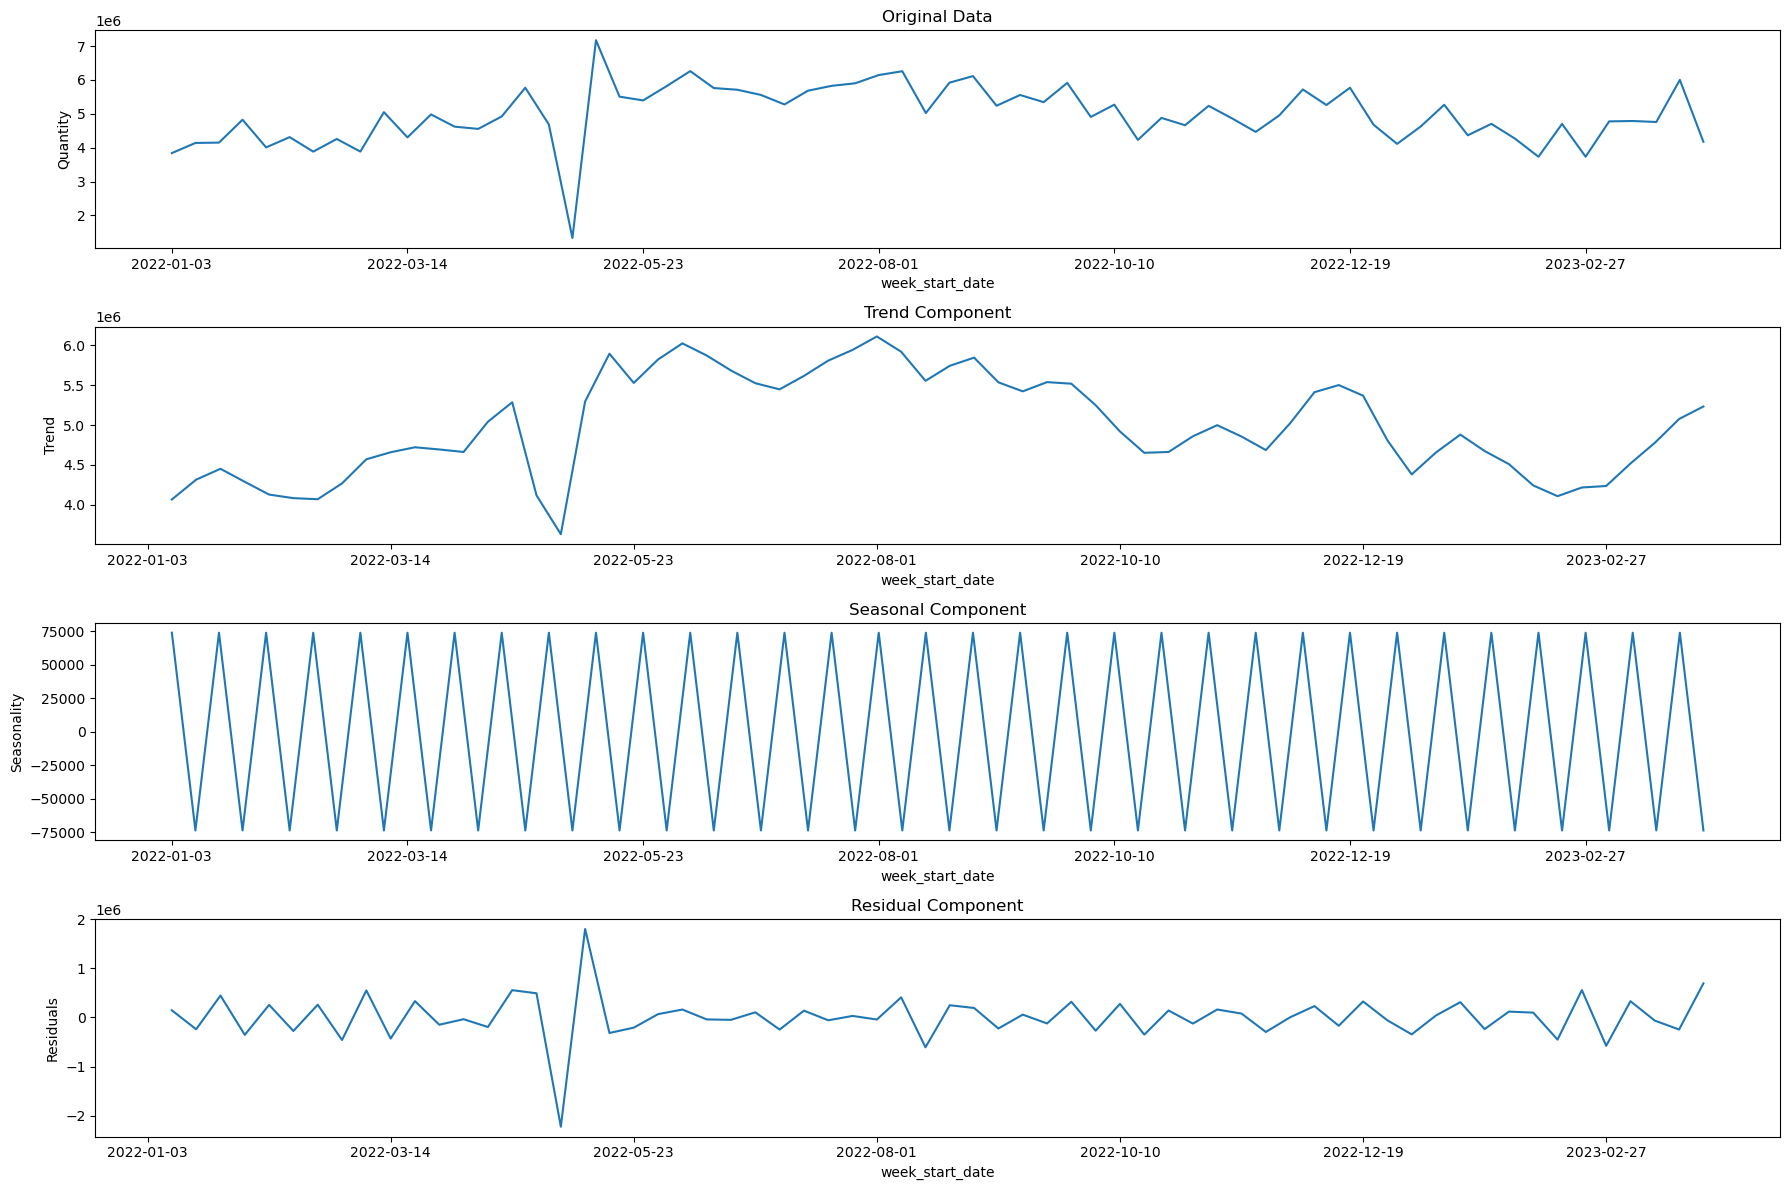

In [29]:
decomposed = seasonal_decompose(new_df['quantity'], model='additive', period=2)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 12))

ax1.set_ylabel('Quantity')
ax1.set_title('Original Data')
new_df['quantity'].plot(ax=ax1)

ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')
decomposed.trend.plot(ax=ax2)

ax3.set_ylabel('Seasonality')
ax3.set_title('Seasonal Component')
decomposed.seasonal.plot(ax=ax3)

ax4.set_ylabel('Residuals')
ax4.set_title('Residual Component')
decomposed.resid.plot(ax=ax4)

plt.tight_layout()
plt.show()


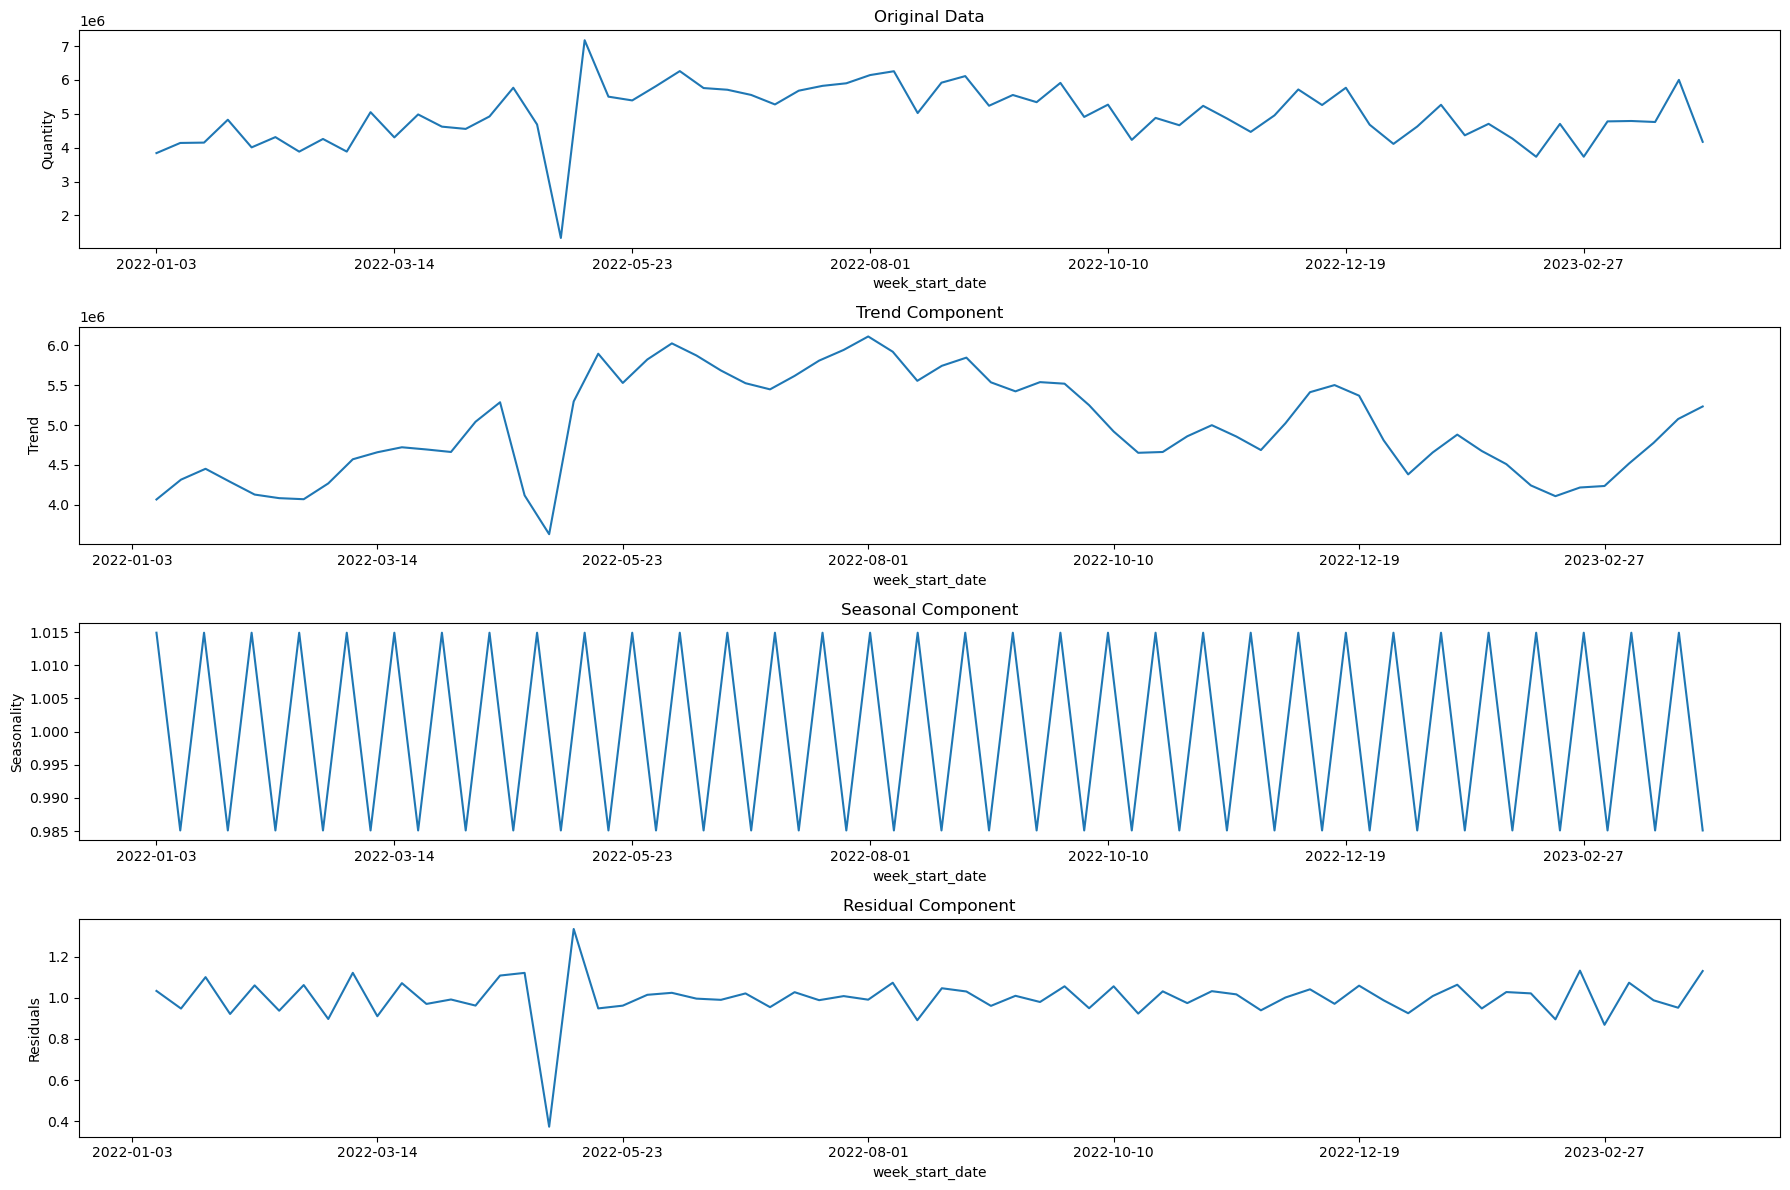

In [30]:
decomposed = seasonal_decompose(new_df['quantity'], model='multiplicative', period=2)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 12))

ax1.set_ylabel('Quantity')
ax1.set_title('Original Data')
new_df['quantity'].plot(ax=ax1)

ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')
decomposed.trend.plot(ax=ax2)

ax3.set_ylabel('Seasonality')
ax3.set_title('Seasonal Component')
decomposed.seasonal.plot(ax=ax3)

ax4.set_ylabel('Residuals')
ax4.set_title('Residual Component')
decomposed.resid.plot(ax=ax4)

plt.tight_layout()
plt.show()


## Analisa Data

kita perlu mengecek apakah data kita stationary atau tidak. Kita dapat menggunakan metode Augmented Dickey-Fuller (ADF) untuk mengetahui hal ini. Jika hasil dari ADF menunjukkan p-value kurang dari 0.05, maka kita dapat menganggap bahwa data kita stationary.

In [31]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [32]:
adf_test(new_df)

ADF Statistic: -2.794084
p-value: 0.059124


In [33]:
first_diff = new_df.diff().fillna(0)
first_diff

,quantity
week_start_date,
2022-01-03,0.0
2022-01-10,299377.0
2022-01-17,10143.0
2022-01-24,675196.0
2022-01-31,-816246.0
...,...
2023-03-06,1042684.0
2023-03-13,11473.0
2023-03-20,-29521.0


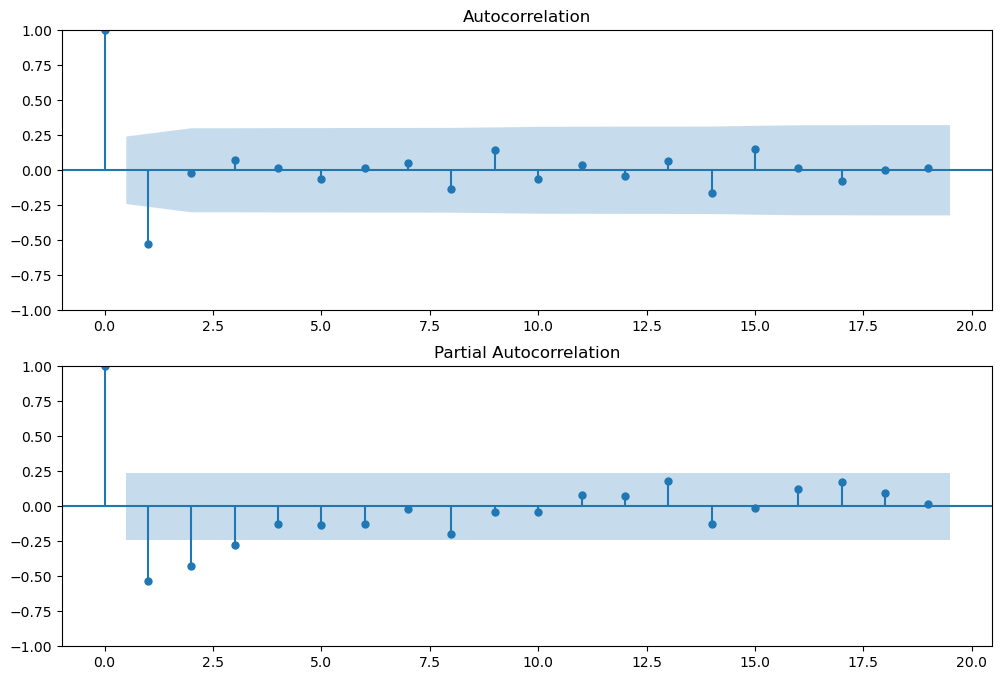

In [34]:
# Plot ACF and PACF
fig, ax = plt.subplots(nrows=2, figsize=(12, 8))

plot_acf(first_diff, ax=ax[0])
plot_pacf(first_diff, ax=ax[1])

plt.show()


In [35]:
train = new_df[:'2022']
test = new_df['2023':]

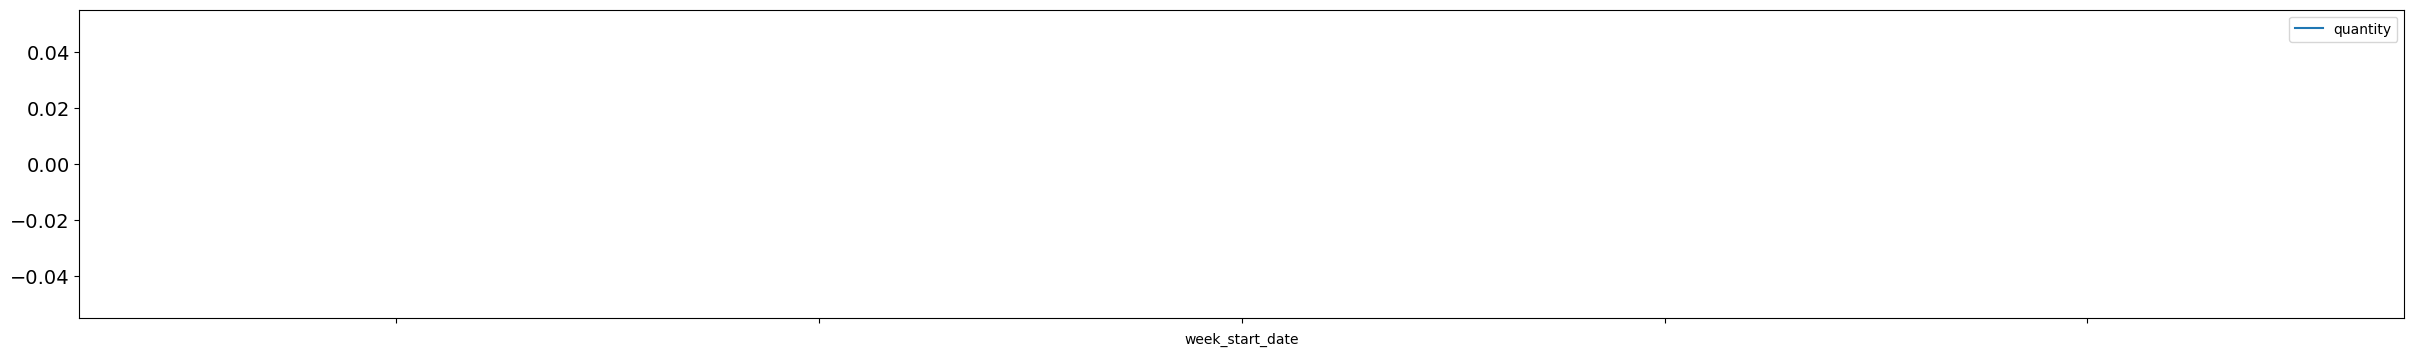

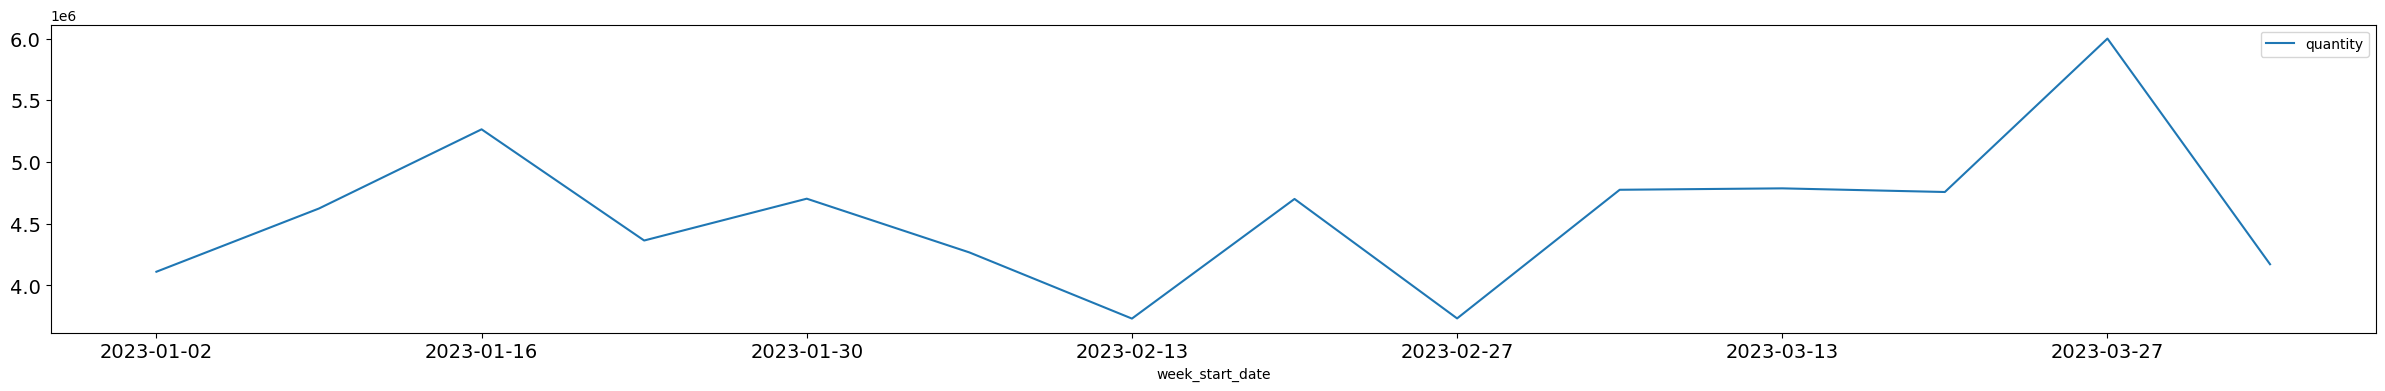

In [36]:
train.plot(figsize=(30,4), fontsize=14)
test.plot(figsize=(30,4), fontsize=14)
plt.show()
